In [1]:
#Importing packages
using Plots
using StatsBase
using StatsPlots
using Distributions
using LinearAlgebra
using LaTeXStrings
using CSV, DataFrames
using Random
using LsqFit

**Inverse Participation Ratio**


Inverse Participation Ratio (IPR) is a measure of the localisation of the wavefunction. It is defined as

$$IPR = \sum \limits_{i=1}^N |\psi_i|^2$$

If the particle is delocalised over all the wavefunctions evenly, then $|\psi_i|^2 \sim \frac{1}{N^2}$, thus, $IPR\sim \frac{1}{N}$
If the particle is localised only on one state, then  $|\psi_i|^2 \sim 1$ for that state and zero for other, hence $IPR\sim 1$. 

In our case, we see how IPR is varied when we increase the sparseness of the matrix. For this, we calculated the IPR for all energies and took average of them to obtain the averaged IPR for a particular value of $p=\frac{P}{Q}$. 

We do this for different $N\times N$ matrices where $N\in [10,20,40,70,100,200,500]$

In [2]:
function H_GOE(n)
    A=rand(Normal(0,1), n,n)
    Q=(A+transpose(A))/2
    Q
    end

H_GOE (generic function with 1 method)

In [3]:
function H_GUE(n)
    H=complex(zeros(n,n))
    for i = 1:n
        for j = 1:n
            if i==j
                H[i,j]=rand(Normal(0,1))
            elseif i<j
                    H[i,j]=rand(Normal(0,1))+rand(Normal(0,1))im
                    H[j,i]=conj(H[i,j])
                end
            end
        end
    H
    end


H_GUE (generic function with 1 method)

In [4]:
function generate_sparse(n,P,b)
    if(b==1)
        H=H_GOE(n)   
    elseif (b==2)
        H=H_GUE(n) 
    end
    for q =1:P
        i = rand(DiscreteUniform(1,n))
        j = rand(DiscreteUniform(1,n))
        while(H[i,j]==0 || i==j)
            i = rand(DiscreteUniform(1,n))
            j = rand(DiscreteUniform(1,n))
        end
        if (i!=j)
            H[i,j]=0
            H[j,i]=0
        end
    end
    return H
end



generate_sparse (generic function with 1 method)

In [5]:
function IPR_Plot(N)
    Q=N*(N-1)/2
    b=2
    P=LinRange(1,Q,200)
    print(P)
    data=[]
    for i in P
        IPR=[]
        E=[]
        for k in 1:100
            A=eigen(generate_sparse(N,i, b))
            for j =1:N
                Energy = P.values[j]
                EVec = P.vectors[:,j]
                S=0
                for m in 1:N
                    S=S+(abs(EVec[m])^4)
                end
                append!(IPR, S )
            end
        end
        append!(data,sum(IPR)/length(IPR))
    end 
    IPR
end


IPR_Plot (generic function with 1 method)

In [ ]:
N=10
Q=N*(N-1)/2
b=2
P=LinRange(1,Q, 200)
data=[]
for i in P
    IPR=[]
    for k in 1:100
        A=eigen(generate_sparse(N,i, b))
        for j =1:N
            Energy = A.values[j]
            EVec = A.vectors[:,j]
            S=0
            for m in 1:N
                S=S+(abs(EVec[m])^4)
            end
            append!(IPR, S )
        end
    end
    append!(data,sum(IPR)/length(IPR))
end 
df = DataFrame(avgIPR=data)
CSV.write("IPR_Sparse_GOE.ods", df)
plot(P./Q, data)


In [ ]:
for N in [20, 40,70, 100, 200, 500]
    Q=N*(N-1)/2
    b=2
    P=LinRange(1,Q, 200)
    data=[]
    for i in P
        IPR=[]
        for k in 1:100
            A=eigen(generate_sparse(N,i, b))
            for j =1:N
                Energy = A.values[j]
                EVec = A.vectors[:,j]
                S=0
                for m in 1:N
                    S=S+(abs(EVec[m])^4)
                end
                append!(IPR, S )
            end
        end
        append!(data,sum(IPR)/length(IPR))
    end 
    col= CSV.read("IPR_Sparse_GUE.ods", DataFrame)
    df = DataFrame(avgIPR=data)
    col1=hcat(col, df, makeunique=true)
    CSV.write("IPR_Sparse_G.ods", col1) 
    #plot!(P./Q, data)
end

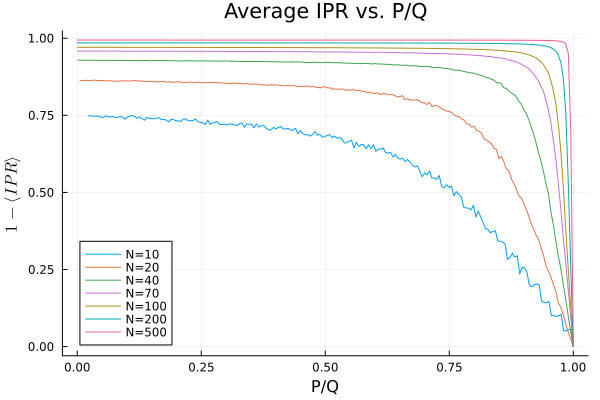

In [2]:
IPR_avg = CSV.read("IPR_GOE.csv", DataFrame)
plot()
x= [10,20,40,70,100, 200,500]
for i in 1:length(x)
    Q=x[i]*(x[i]-1)/2
    P=LinRange(1,Q, 200)
    q=x[i]
    plot!(P./Q, 1 .-IPR_avg[:,i], label = "N=$q")
end
display(plot!(xlabel="P/Q", ylabel=L"1-\langle IPR \rangle", title="Average IPR vs. P/Q"))

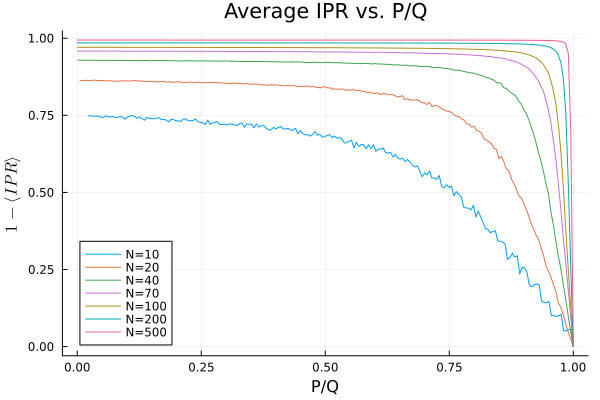

In [3]:
IPR_avg1 = CSV.read("IPR_GUE.csv", DataFrame)
plot()
x= [10,20,40,70,100, 200,500]
for i in 1:length(x)
    Q=x[i]*(x[i]-1)/2
    P=LinRange(1,Q, 200)
    q=x[i]
    plot!(P./Q, 1 .-IPR_avg[:,i], label = "N=$q")
end
display(plot!(xlabel="P/Q", ylabel=L"1-\langle IPR \rangle", title="Average IPR vs. P/Q"))

Here, we can see that when $p=P/Q$ is small, the IPR value is almost constant and the constant is different for different matrix sizes, hence it is a delocalised state. As p increases, the $1- \langle IPR \rangle \longrightarrow 0$, hence  $\langle IPR \rangle \longrightarrow 1$. Thus, there is localisation.

Now we see, what happens when p is small. We take the first 20 IPR and average them for each N and then plot is against N.

In [47]:
IPR_GOE=[]
for i in 1:7
    append!(IPR_GOE, mean(IPR_avg[!,i][1:20]))
end

IPR_GUE=[]
for i in 1:7
    append!(IPR_GUE, mean(IPR_avg1[!,i][1:20]))
end

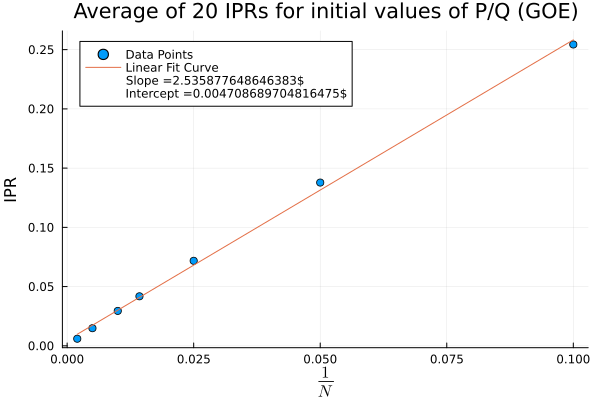

In [50]:
N=[10,20,40,70,100,200,500]
N_inv= 1 ./N
scatter(N_inv, IPR_GOE, xlabel=L"\frac{1}{N}", ylabel="IPR", title="Average of 20 IPRs for initial values of P/Q (GOE)", label="Data Points")
m(t, p) =p[1]*t.+p[2]
fit=curve_fit(m,N_inv, IPR_GOE,[1.0,0.0]);
a,b=fit.param;
plot!(N_inv, a*N_inv.+b, label="Linear Fit Curve")
plot!([0.025], [0.05], color=:white, label=L"Slope =%$a$")
plot!([0.025], [0.05], color=:white, label=L"Intercept =%$b$")

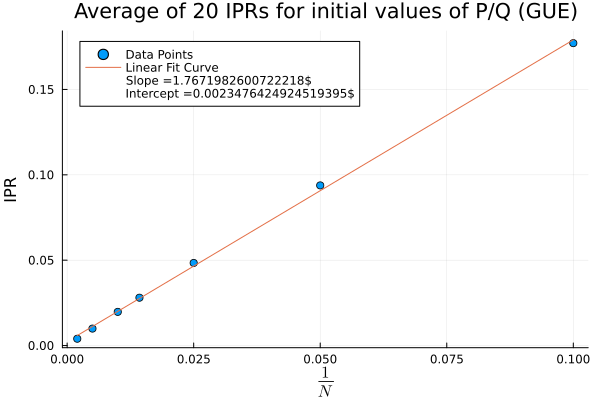

In [51]:
N=[10,20,40,70,100,200,500]
N_inv= 1 ./N
scatter(N_inv, IPR_GUE, xlabel=L"\frac{1}{N}", ylabel="IPR", title="Average of 20 IPRs for initial values of P/Q (GUE)", label="Data Points")
m(t, p) =p[1]*t.+p[2]
fit=curve_fit(m,N_inv, IPR_GUE,[1.0,0.0]);
a,b=fit.param;
plot!(N_inv, a*N_inv.+b, label="Linear Fit Curve")
plot!([0.025], [0.05], color=:white, label=L"Slope =%$a$")
plot!([0.025], [0.05], color=:white, label=L"Intercept =%$b$")

Here we can see that the plot of IPR vs $\frac{1}{N}$ follows a linear trend. The plot has been fit with a linear curve and found the slopes: 2.53 for GOE and 1.76 for GUE. Ideally it should have been $\sim 1$. The anomaly can be because we have taken the IPR of all the energies together and done an average which might have made the IPR non-homogenous. 